In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Assuming 'target' is the column you want to predict
target_column = 'Prediction'

# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier (Multinomial Naive Bayes)
clf = MultinomialNB()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.94
Confusion Matrix:
 [[694  45]
 [ 16 280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.86      0.95      0.90       296

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



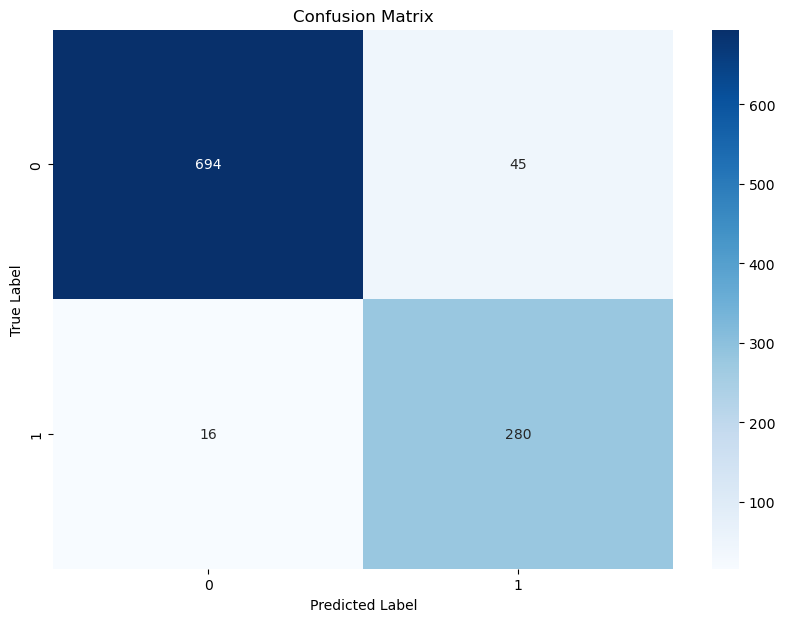

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

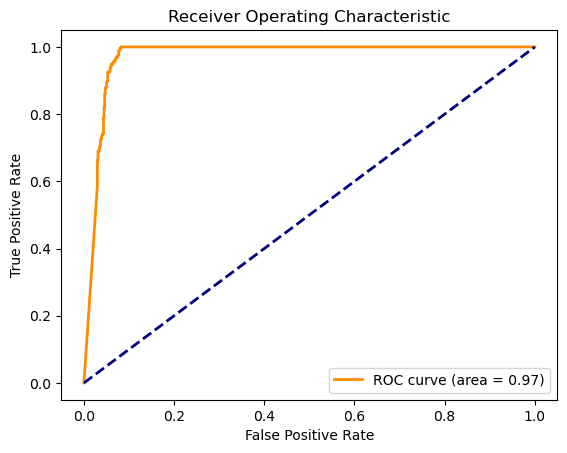

In [4]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

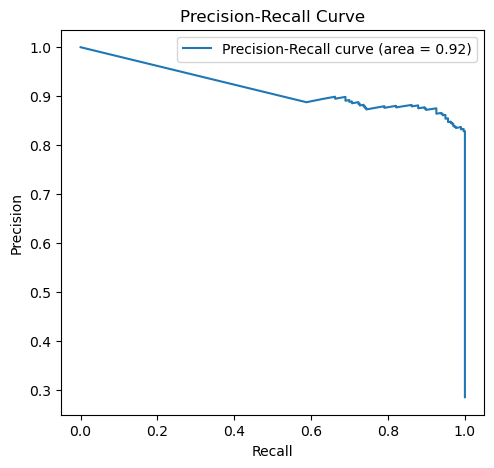

In [6]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
auc_score = auc(recall, precision)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.plot(recall, precision,label=f'Precision-Recall curve (area = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

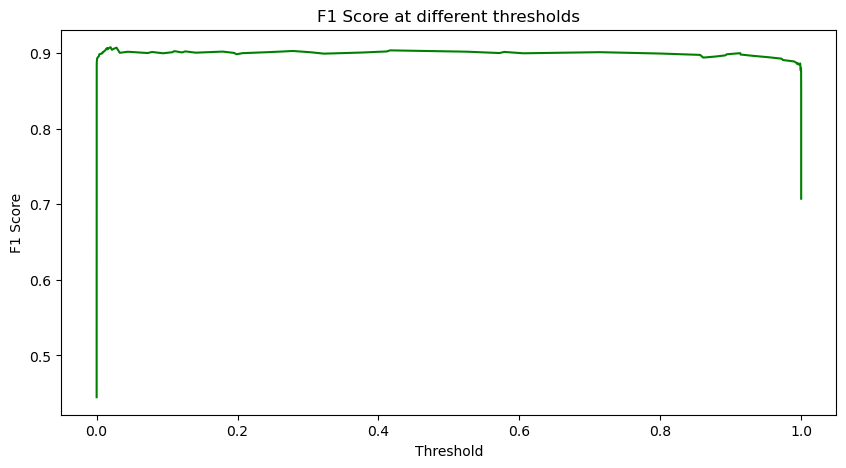

In [12]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
f1_scores = 2 * recall * precision / (recall + precision)


plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores[:-1], color='green')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score at different thresholds')
plt.show()